TITLE:  PREDICT READMISSION RATE FOR DIABETES PATIENTS  

# Introduction


Diabetes is a chronic disease in which the body’s ability to produce or respond to the hormone insulin is impaired that causes elevated levels of glucose in the blood and urine.
Insulin is a hormone secreted by the pancreas to maintain normal blood glucose levels by facilitating cellular glucose uptake, regulating carbohydrate, lipid and protein metabolism (1). There are two types of diabetes. In type 1 diabetes, patients don't produce insulin and in type II diabetes, patients don't respond well to insulin. Both can lead to diabetes complications such as irreversible damage to the eyes, kidneys, heart, brain, feet, and nervous system if the illness is not managed. People with the disease need regular care such as daily glucose monitoring and maintain a healthy diet to prevent high concentration of sugar in blood.  

In recent years, government agencies and healthcare providers have been focusing on 30-day readmission rates as a method to measure the quality of care. Deaths after 30 days releasing from a hospital may have less to do with the care given at the hospital. In 2012, the Centers for Medicare and Medicaid Services (CMS) launched its Hospital Readmission Reduction Program under the Patient Protection and Affordable Care Act (2). The program promotes reduction within 30 days readmission rates by providing tax incentives for hospitals with healthy readmission rates. Readmission rates is excessive when the hospital's readmission rates is higher than the national average given the same sex, age and co-existing conditions (3). 

Currently, the program does not cover diabetes as one of the illnesses. However, many hospitals and government agencies use 30-day readmission rate as a method to analyze the quality of care. A high readmission rate causes a high burden to healthcare systems and patients. Diabetes remains one of the greatest risk factors for readmission (4). According to the CDC, 34.2 million Americans (10% of Americans) have diabetes (5). Diabetes cost the nation almost 250 billion dollars in 2012 (6). Hospitals may have more insights on how to improve quality of care as well as reduce cost by measuring readmission rates for diabetes patients.

# Project Goals

The goal of this project is to use machine learning to predict the readmission rate for diabetes patients. 

# Python Libraries and Data

## Libraries 

In [1]:
import pandas as pd
from zipfile import ZipFile
from urllib.request import urlopen   
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import sklearn 

## Data

### About the Data:

Diabetes dataset comes from UCI Machine Learning Repository. The data can be accessed [here](https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008).


The data contains medical records of 130-US hospitals for years 1999-2008 about the impact of HbA1c Measurement on Hospital Readmission Rates. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria:

    (1) It is an inpatient encounter (a hospital admission)

    (2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis

    (3) The length of stay was at least 1 day and at most 14 days

    (4) Laboratory tests were performed during the encounter

    (5) Medications were administered during the encounter

The data contains attributes such as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, and other information.

In [2]:
df = pd.read_csv('/Users/kieuha/Desktop/diabetic_data.csv')

## Data Column Details

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [4]:
df.shape

(101766, 50)

# Raw Data Exploration

Data exploreation is the first and very important step in the data analysis process. It is an opportunity for an analyzer to understand what is in the data. The data may contains NaN values, duplicates, or missing values which are required to be dealth with in the data cleaning section. The data may present certain patterns or characteristics that are worth to make a notice to create a broad picture of what the data about and how to use it to acheive the project objectives.

To have a good picture of the data, many data visulaizations are used such as, scatter plots, charts and histograms. These graphs may be used to compare different features to see trends. Note that they need to graph on the same scale for accurate comparison. Another use of visualizations is that analysts can quickly determine which features are categorical and which ones are numerical. Both often dictates which models to use for analysis. 

Data exploration can be tidious and may require data cleaning to produce graphs. However, it reduces work time down the road. 

## Check for Duplicates

Duplicated method is a useful function to analyze duplicate values.  It returns a list of boolean series. To find out how many duplicate values are in the data, the sum method is used. The numerical value represents number of the duplicates in the dataframe. If the sum method returns "0", it means that there are no duplicates.

In [5]:
df.duplicated().sum()

0

## Check for Missing Data

### None Type Data

In [6]:
(df.values == "None").any()

True

In [7]:
df.applymap(lambda x: x=='None').any().head(50)

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
weight                      False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                  False
medical_specialty           False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum                True
A1Cresult                    True
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

### Check for Question Marks

In [8]:
(df.values == '?').any()

True

In [9]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

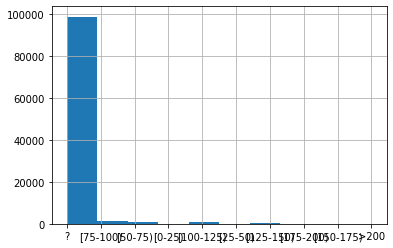

In [10]:
df['weight'].hist()

In [11]:
len(df[df['weight'] == '?'])

98569

The column Weight has 98569 question marks which indicates majority of the data missing from this column.

### Check for NaN Data

In [12]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [13]:
missing_values_table(df)

Your selected dataframe has 50 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

## Data Exploration by Graphs

Select 0.5% of the data to graph for a quick view. Set y to be readmitted as target variable. 

In [14]:
df_sampled = df.sample(frac=0.05)

In [15]:
y=df_sampled['readmitted']

In [16]:
x=df_sampled.drop(['readmitted'], axis=1)

In [17]:
features = "race", "gender", "medical_specialty", "max_glu_serum", "A1Cresult",\
"metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride",\
"acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", \
"rosiglitazone", "acarbose", "miglitol","troglitazone", "tolazamide", "examide",\
"citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", \
"glimepiride-pioglitazone", "metformin-rosiglitazone","metformin-pioglitazone", \
"change", "diabetesMed", "readmitted", "num_lab_procedures", "num_procedures", \
"num_medications", "number_outpatient", "number_emergency", "number_inpatient",\
"number_diagnoses", "num_procedures"

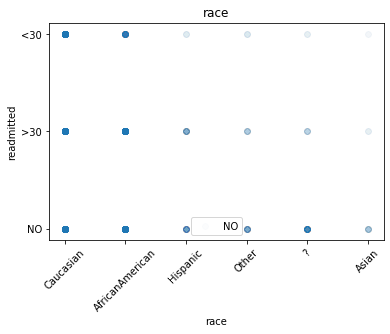

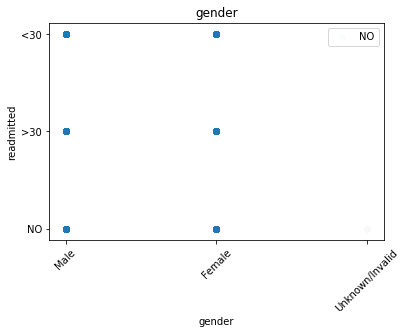

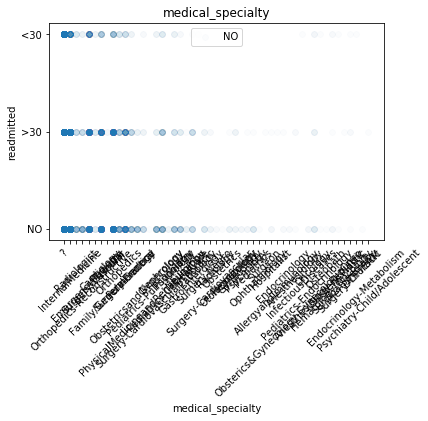

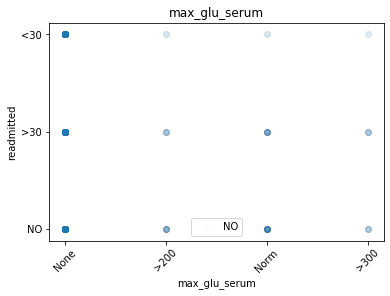

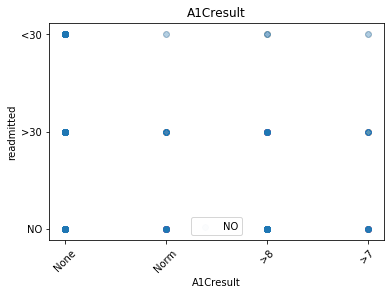

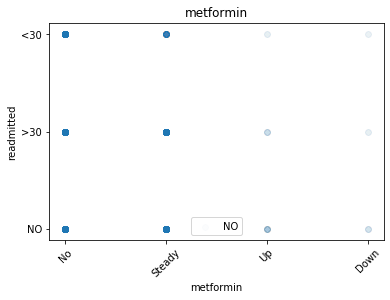

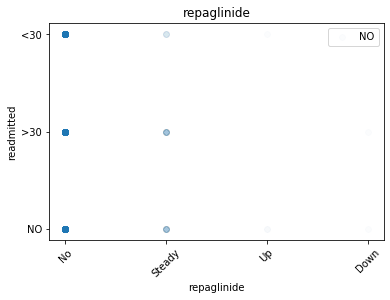

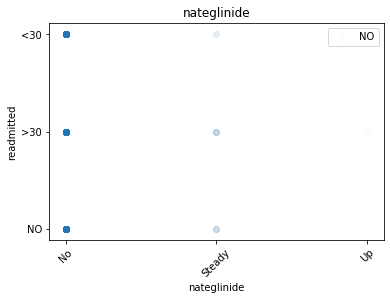

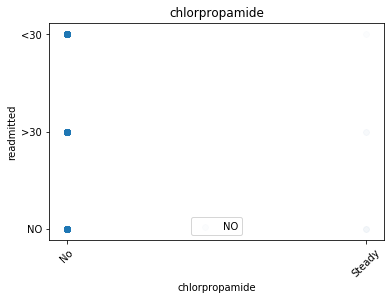

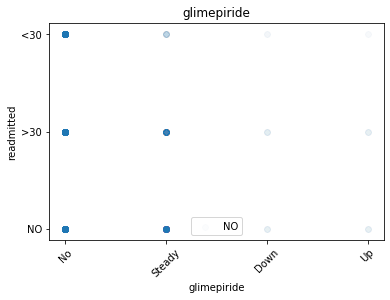

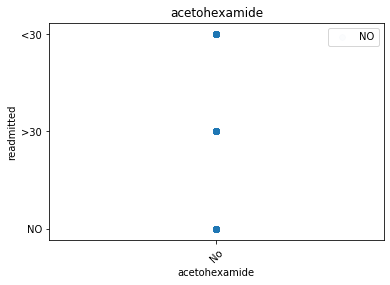

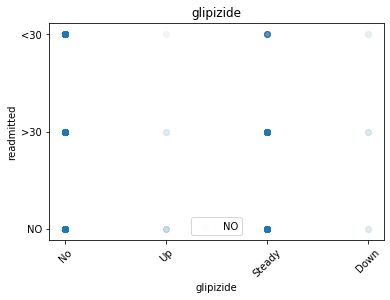

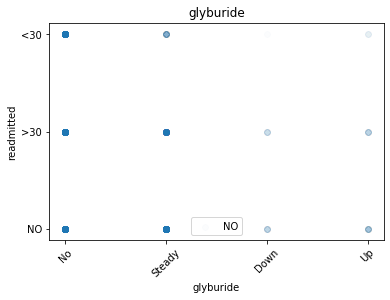

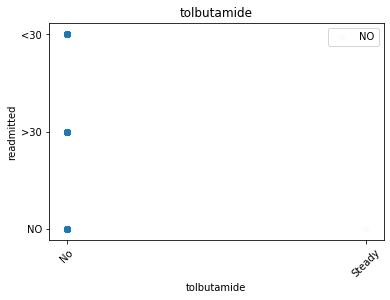

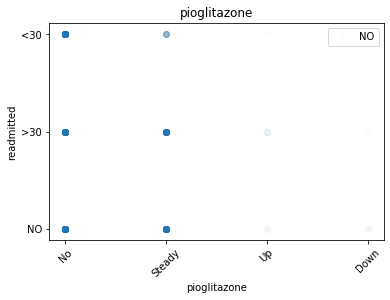

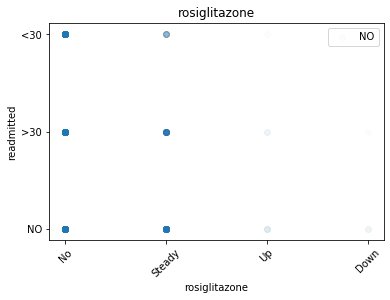

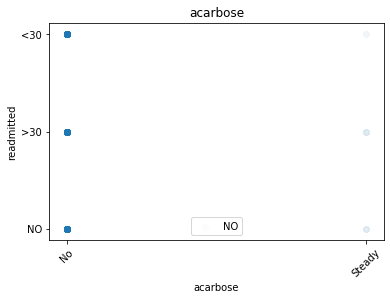

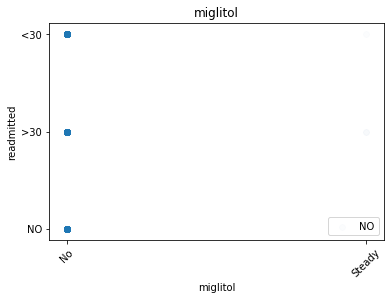

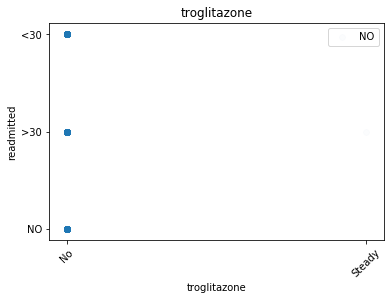

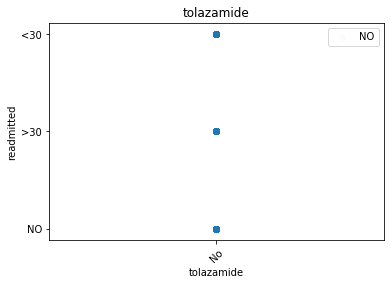

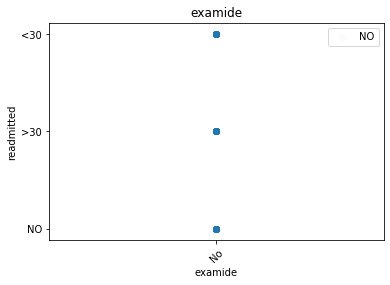

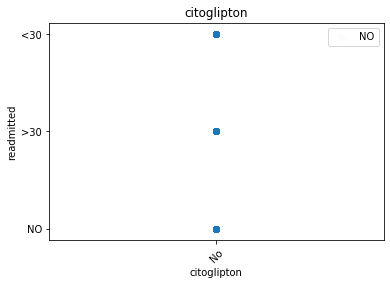

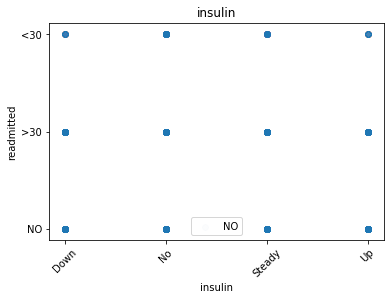

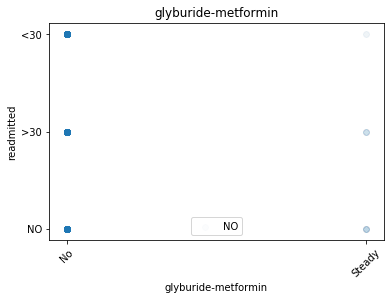

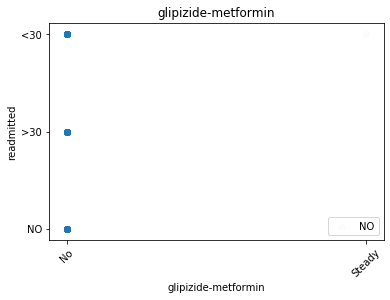

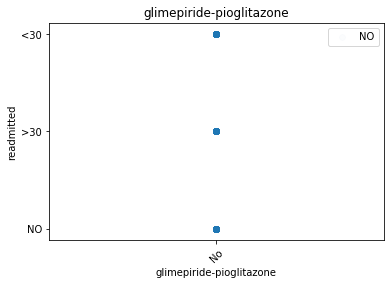

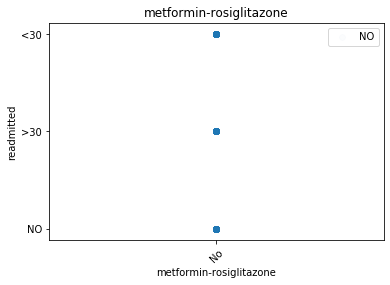

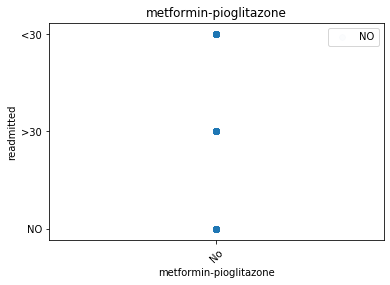

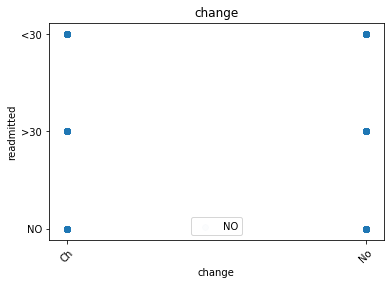

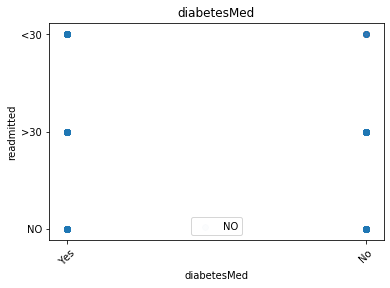

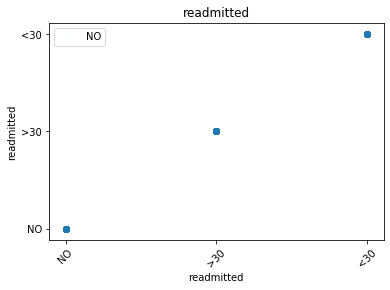

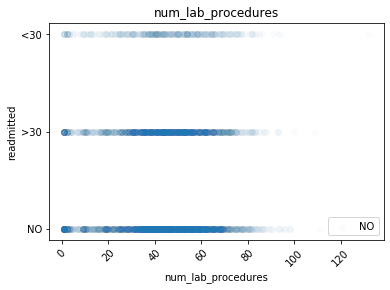

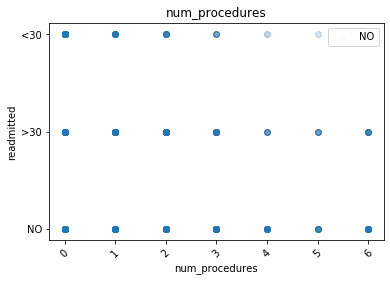

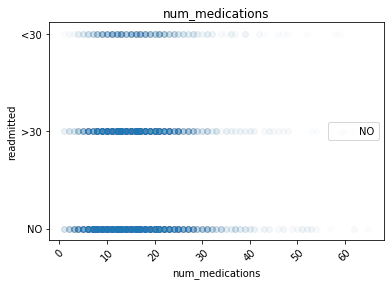

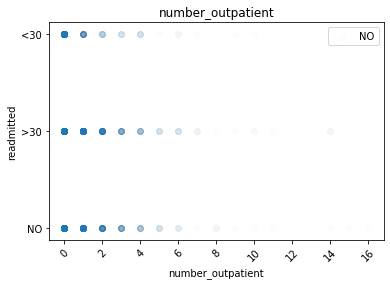

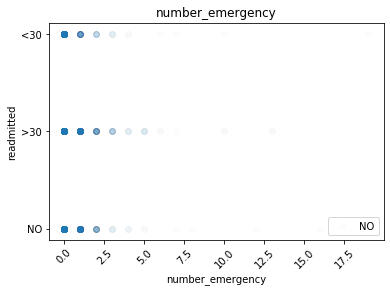

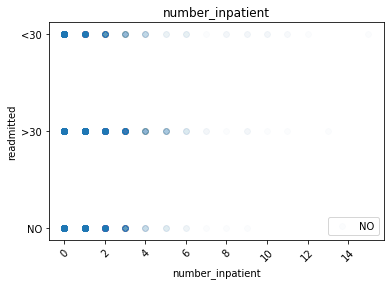

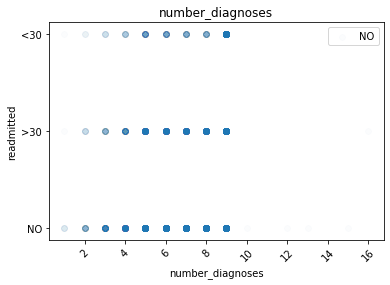

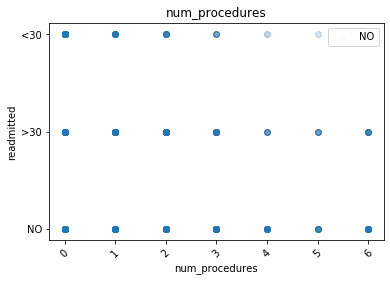

In [18]:
for col in features:
    plt.scatter(df_sampled[col],y, alpha=0.015)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('readmitted')
    plt.legend(y)
    plt.xticks(rotation=45)
    plt.show()

### Numerical Features

In [19]:
numericals = ["num_lab_procedures", "num_procedures",\
              "num_medications", "number_outpatient", "number_emergency",\
              "number_inpatient", "number_diagnoses", "num_procedures"]

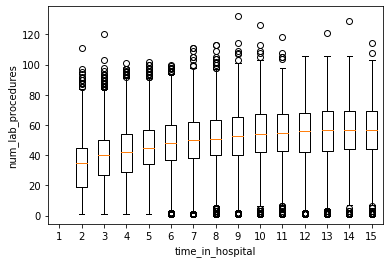

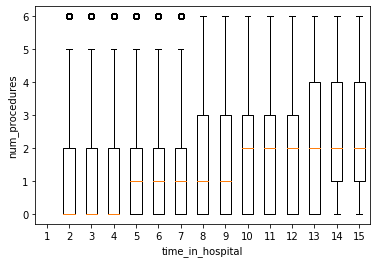

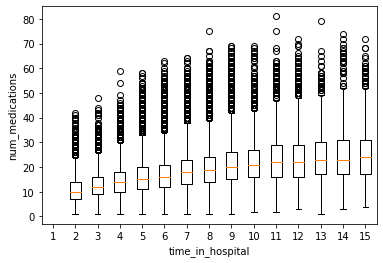

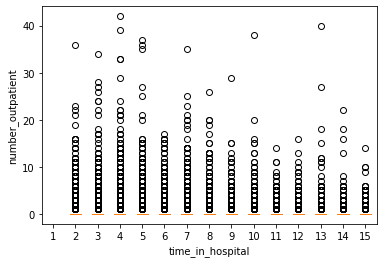

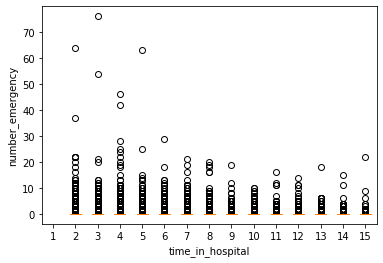

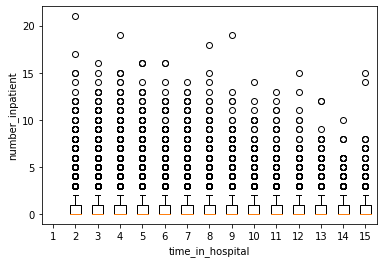

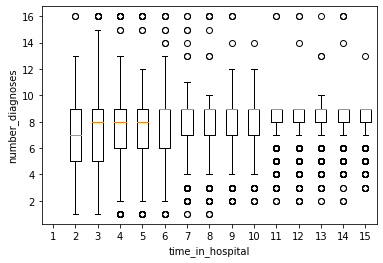

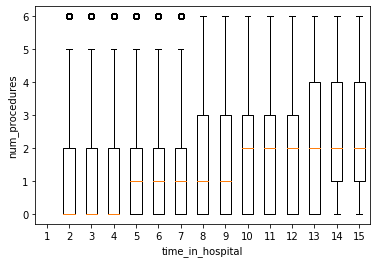

In [20]:
for col in numericals:
    data = []

    for i in range(15):
        data.append(df[col][df['time_in_hospital']==i])
    plt.boxplot(data)
    plt.xlabel('time_in_hospital')
    plt.ylabel(col)
    plt.show()

### Categorical Features

In [21]:
categoricals = ["race", "gender", "medical_specialty",\
"max_glu_serum", "A1Cresult", "metformin", \
"repaglinide", "nateglinide", "chlorpropamide", "glimepiride","acetohexamide",\
"glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose",\
"miglitol","troglitazone", "tolazamide", "examide", "citoglipton", "insulin", \
"glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", \
"metformin-rosiglitazone","metformin-pioglitazone", "change", "diabetesMed", "readmitted"] 

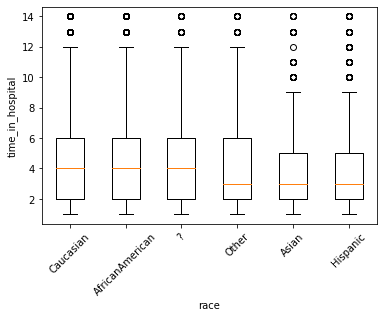

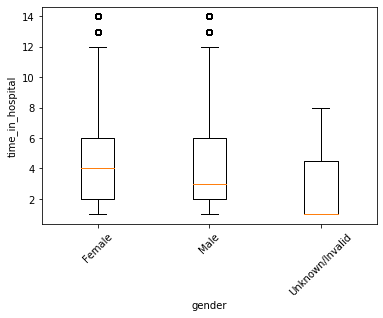

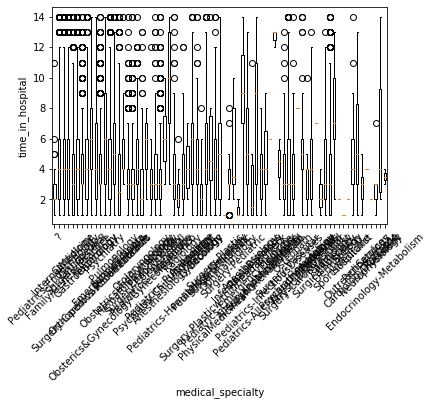

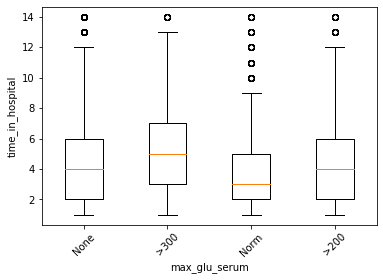

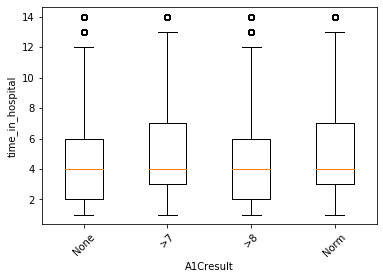

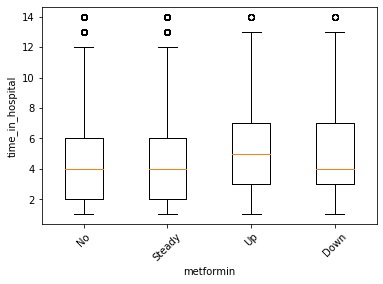

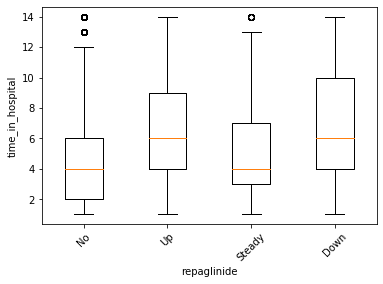

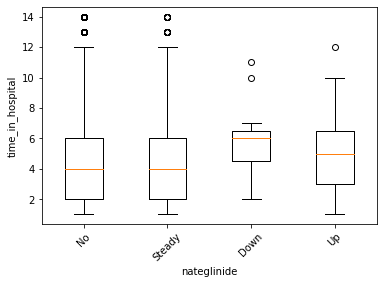

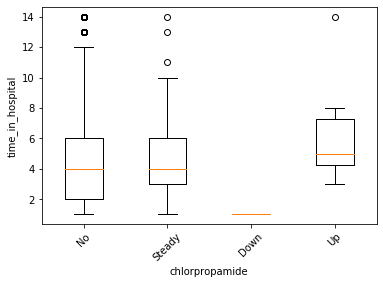

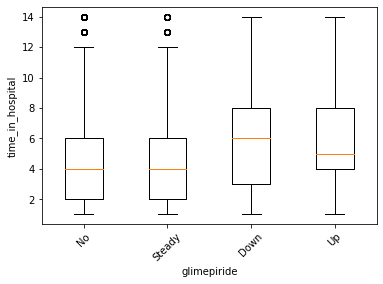

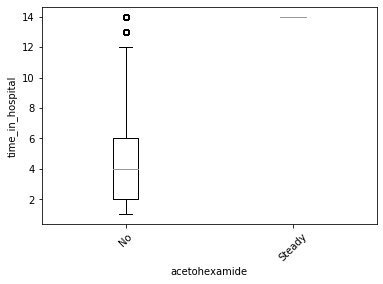

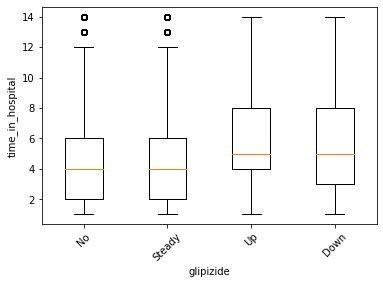

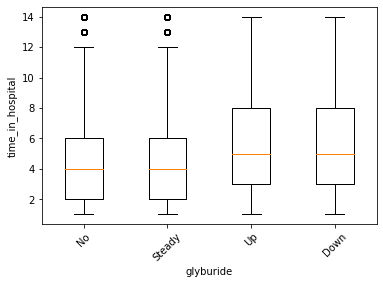

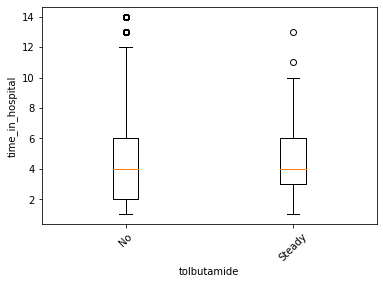

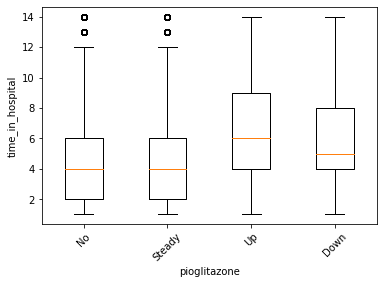

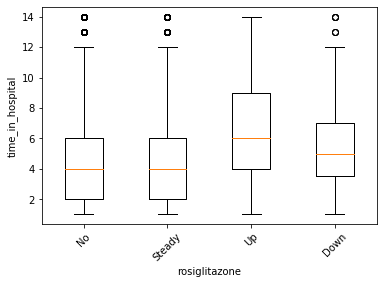

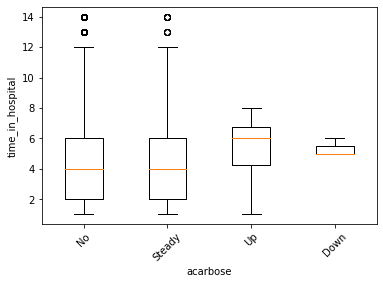

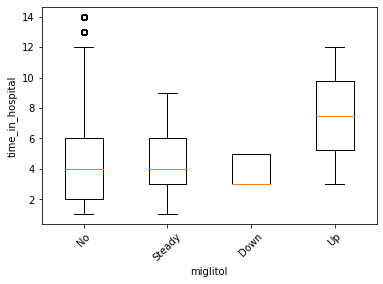

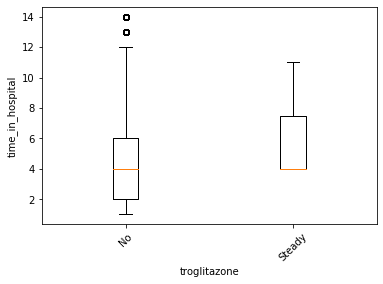

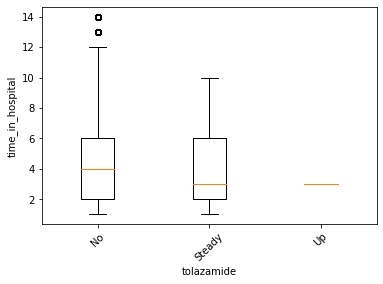

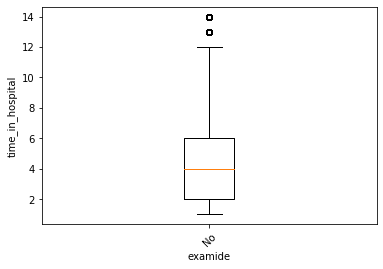

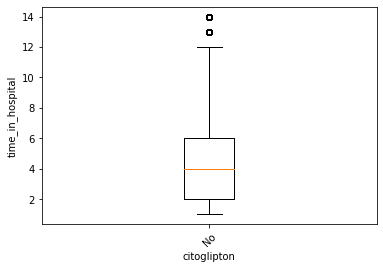

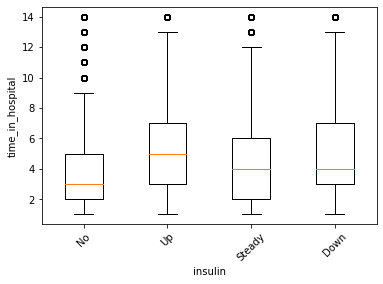

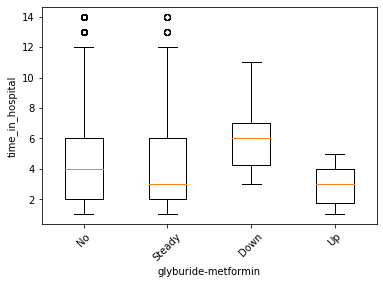

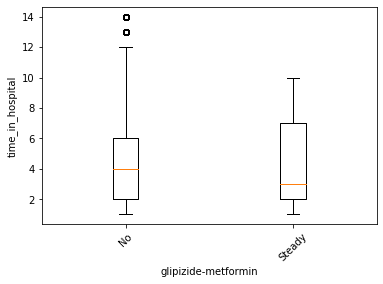

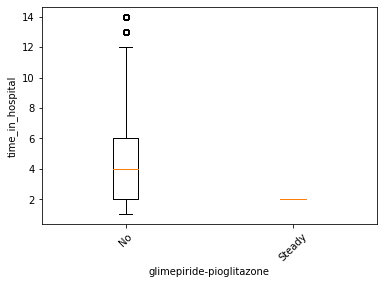

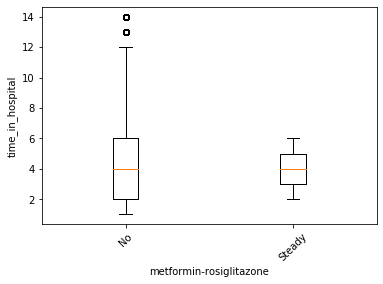

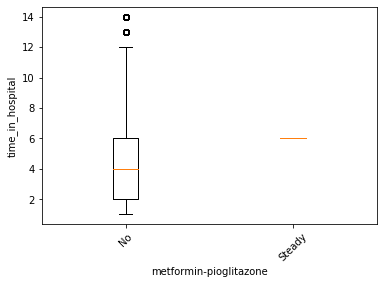

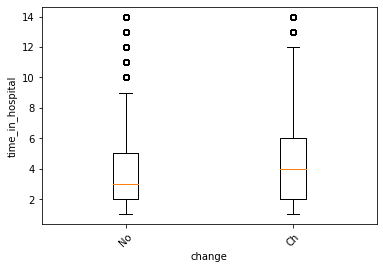

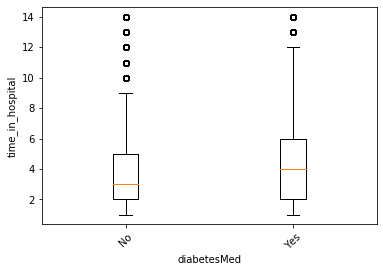

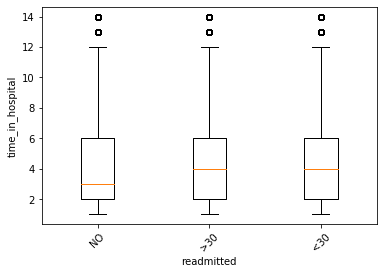

In [22]:
for col in categoricals:
    data = []
    categories = df[col].unique()
    for cat in categories:
        data.append(df['time_in_hospital'][df[col]==cat])
    plt.boxplot(data)
    plt.xticks(range(1, len(categories)+1), categories)
    plt.ylabel('time_in_hospital')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.show()

### Histograms

In [23]:
hist_columns = 'race', 'gender', 'weight', 'age', 'admission_source_id',\
'time_in_hospital', 'payer_code', 'num_lab_procedures',\
'num_procedures','num_medications','number_outpatient','number_emergency',\
'number_inpatient'   

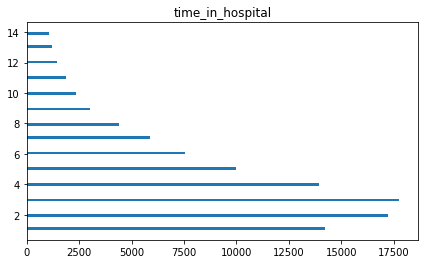

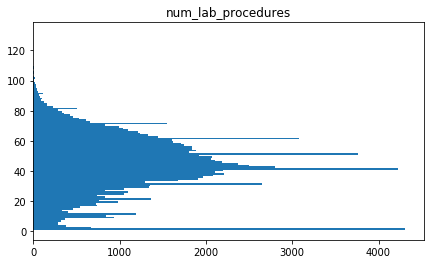

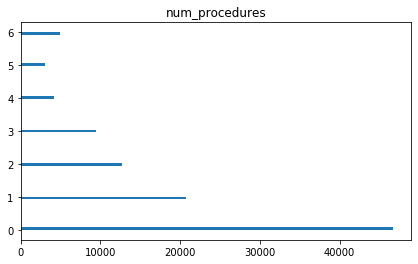

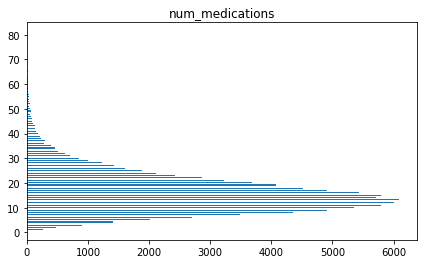

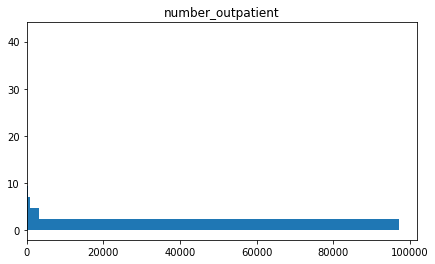

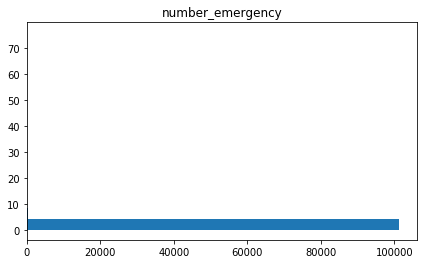

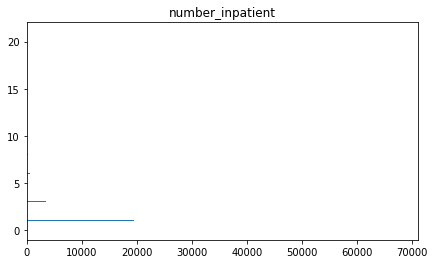

In [24]:
hori_hist_columns = 'time_in_hospital',\
'num_lab_procedures','num_procedures','num_medications',\
'number_outpatient','number_emergency','number_inpatient'
for i in hori_hist_columns:
    plt.figure(figsize=(7,4))
    plt.hist(df[i], bins = 'auto', orientation='horizontal')
    
    plt.title(i)
    plt.show  

## View Unique Data in Columns

Unique function is used to view the unique values in each column. This gives a quick view of what in each column.

In [25]:
unique_list = ['time_in_hospital','medical_specialty', 'num_lab_procedures',\
'num_procedures','num_medications', 'number_outpatient', 'number_emergency',\
'number_inpatient','number_diagnoses', 'max_glu_serum', 'A1Cresult', \
'metformin', 'repaglinide', 'diag_1', 'diag_2', 'diag_3']

In [26]:
for i in unique_list:
    print("-------------------------------------------------------------------")
    print (i)
    print(df[i].unique())

-------------------------------------------------------------------
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
-------------------------------------------------------------------
medical_specialty
['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surg

Diag_1, diag_2 and diag_3 have over 700 unique values. Since the diabetes data does not come with codes to explain what they mean. These columns will not be useful features to be analyzed. For the purpose of this project, they are dropped from the data. 

# Data Cleaning

## Drop Non-Applicable and Features

These columns below provide additional details of each diagnoses for each patient identidied by their ID. They are useful for billing and other purposes but not useful for predicting the time stayed in the hospital.

In [27]:
df = df.drop('encounter_id', axis = 1)
df = df.drop('patient_nbr', axis = 1)
df = df.drop('admission_type_id', axis = 1)
df = df.drop('admission_source_id', axis = 1)
df = df.drop('payer_code', axis = 1)
df = df.drop('weight', axis = 1)
df = df.drop('diag_1', axis = 1)
df = df.drop('diag_2', axis = 1)
df = df.drop('diag_3', axis = 1)

Discharge ID provides information about the reason the patients was discharged from the hospital. Discharge ID # 11, 12, 13, 14, 19, 20 mean the patient died. These patients are removed from the data since they can't be readmitted.

In [28]:
death_codes = [11, 12, 13, 14, 19, 20]
df = df.copy()
for code in death_codes:
    df = df[df.discharge_disposition_id !=code]

df['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5,  7, 10,  4, 18,  8, 16, 17, 22, 23,  9, 15,
       24, 28, 27])

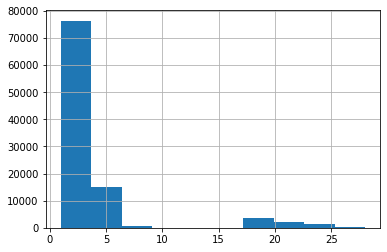

In [29]:
df['discharge_disposition_id'].hist()

## Replace "?" with NaN

In [30]:
df.replace('?', np.nan, inplace= True)
df.replace("None", np.nan, inplace=True)

In [31]:
df_no_question_mark = df[~(df == '?').any(axis=1)]

/Users/kieuha/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [32]:
missing_values_table(df_no_question_mark)

Your selected dataframe has 41 columns.
There are 4 columns that have missing values.


Missing Values  % of Total Values
max_glu_serum               94188               94.8
A1Cresult                   82506               83.1
medical_specialty           48616               48.9
race                         2234                2.2

### Fill NaNs

In [33]:
df=df.fillna('NaN')

## Separate Readmission into Different Groups

In [34]:
df.groupby('readmitted').size()

readmitted
<30    11312
>30    35502
NO     52526
dtype: int64

## Medical Specialty-Regroup

In [35]:
df.medical_specialty.nunique()
medical_spec = df.groupby('medical_specialty').size().sort_values(ascending=False)

In [36]:
medical_spec

medical_specialty
NaN                                 48616
InternalMedicine                    14235
Emergency/Trauma                     7419
Family/GeneralPractice               7252
Cardiology                           5279
                                    ...  
Pediatrics-InfectiousDiseases           1
SportsMedicine                          1
Dermatology                             1
Speech                                  1
Surgery-PlasticwithinHeadandNeck        1
Length: 73, dtype: int64

There are too many unique values in Medical Specialty. Select the top 10 and convert the rest to "Others"

In [37]:
MS_top_10 = ['UNK','InternalMedicine', 'Emergency/Trauma', \
             'Family/GeneralPractice','Cardiology','Surgery-General',\
             'Nephrology', 'Orthopedics','Orthopedics-Reconstructive',\
             'Radiologist']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

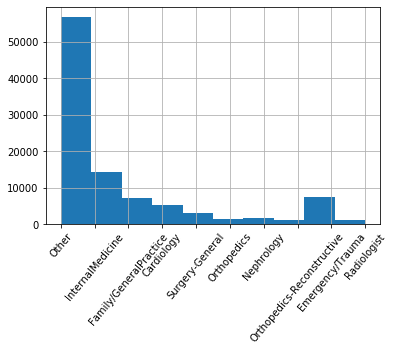

In [38]:
df.loc[~df.medical_specialty.isin(MS_top_10), 'medical_specialty']='Other'
df['medical_specialty'].hist()
plt.xticks(rotation = 50)

## Weight - Convert "?" to NaN

In [39]:
# df['weight'].hist()
# plt.xticks(rotation=45)

## Numerical and Categorical Columns

### Categorical Columns

In [40]:
categorical_columns = ['race', 'gender', 'age','time_in_hospital',\
'max_glu_serum', 'A1Cresult', 'metformin','repaglinide', 'nateglinide', \
'chlorpropamide' 'glimepiride', 'acetohexamide','glipizide', 'glyburide', \
'tolbutamide', 'pioglitazone', 'rosiglitazone','acarbose', 'miglitol', \
'troglitazone', 'tolazamide', 'examide' 'citoglipton','insulin', \
'glipizide-metformin', 'glimepiride-pioglitazone','metformin-rosiglitazone',\
'metformin-pioglitazone', 'change', 'diabetesMed','readmitted']    

In [41]:
numerical_columns = ['time_in_hospital', 'num_lab_procedures',\
'num_procedures','num_medications','number_outpatient','number_emergency',\
'number_inpatient', 'number_diagnoses']

In [42]:
# Scatter Plots
def scatter_plot(col_x, col_y, df, title):
    plt.figure(figsize=(7,4))
    plt.scatter(df[col_x], df[col_y])
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()
    
def bar_plot(col_x, col_y, df, title):
    y = df[[col_x, col_y]].set_index(col_x).groupby()[col_y].mean()
    x = y.index
    plt.bar(x, y)
    plt.title(title)
    plt.legend()
    plt.show()

In [43]:
df['medical_specialty'].nunique()

10

There are many unique values for the Medical Specialty column. 
Further analysis required.

In [44]:
df_medical_specialty = df.groupby('medical_specialty').size().sort_values(ascending = False).head(20)

In [45]:
df_medical_specialty

medical_specialty
Other                         56814
InternalMedicine              14235
Emergency/Trauma               7419
Family/GeneralPractice         7252
Cardiology                     5279
Surgery-General                3059
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Radiologist                    1121
dtype: int64

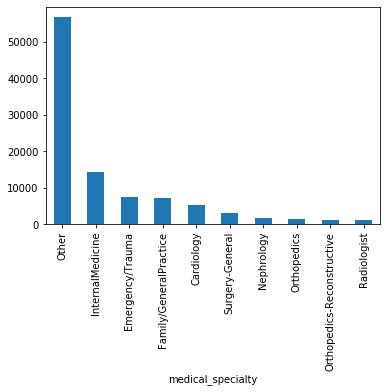

In [46]:
ax = df_medical_specialty.plot.bar(x = 'medical specialty', y = 'val')

# Feature Engineering

## Create Dummy Variables

In [47]:
df.head(5)

race  gender      age  discharge_disposition_id  \
0        Caucasian  Female   [0-10)                        25   
1        Caucasian  Female  [10-20)                         1   
2  AfricanAmerican  Female  [20-30)                         1   
3        Caucasian    Male  [30-40)                         1   
4        Caucasian    Male  [40-50)                         1   

   time_in_hospital medical_specialty  num_lab_procedures  num_procedures  \
0                 1             Other                  41               0   
1                 3             Other                  59               0   
2                 2             Other                  11               5   
3                 2             Other                  44               1   
4                 1             Other                  51               0   

   num_medications  number_outpatient  ...  citoglipton  insulin  \
0                1                  0  ...           No       No   
1               18                  0  ...           No       Up   
2               13                  2  ...           No       No   
3               16                  0  ...           No       Up   
4                8                  0  ...           No   Steady   

   glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0                   No                  No                       No   
1                   No                  No                       No   
2                   No                  No                       No   
3                   No                  No                       No   
4                   No                  No                       No   

  metformin-rosiglitazone metformin-pioglitazone change diabetesMed readmitted  
0                      No                     No     No          No         NO  
1                      No                     No     Ch         Yes        >30  
2                      No                     No     No         Yes         NO  
3                      No                     No     Ch         Yes         NO  
4                      No                     No     Ch         Yes         NO  

[5 rows x 41 columns]

In [48]:
categorical = ["race", "gender", "medical_specialty",\
"max_glu_serum", "A1Cresult", "metformin", \
"repaglinide", "nateglinide", "chlorpropamide", "glimepiride","acetohexamide",\
"glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose",\
"miglitol","troglitazone", "tolazamide", "examide", "citoglipton", "insulin", \
"glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", \
"metformin-rosiglitazone","metformin-pioglitazone", "change", "diabetesMed", "readmitted"]

In [49]:
len(categorical)

31

## Remove Brackets and Replace Age Ranges to Medium

In [50]:
df_dummies = pd.get_dummies(data = df, columns = categorical)
df_dummies['age'] = df_dummies['age'].apply(lambda x: np.mean([float(i) for i in x.replace("[","")\
                                                       .replace(")", "")\
                                                       .split("-")]))
df_dummies['age']

0          5.0
1         15.0
2         25.0
3         35.0
4         45.0
          ... 
101761    75.0
101762    85.0
101763    75.0
101764    85.0
101765    75.0
Name: age, Length: 99340, dtype: float64

In [51]:
len(df_dummies.columns)

115

In [52]:
print(df_dummies.columns)

Index(['age', 'discharge_disposition_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses',
       ...
       'metformin-rosiglitazone_Steady', 'metformin-pioglitazone_No',
       'metformin-pioglitazone_Steady', 'change_Ch', 'change_No',
       'diabetesMed_No', 'diabetesMed_Yes', 'readmitted_<30', 'readmitted_>30',
       'readmitted_NO'],
      dtype='object', length=115)


In [53]:
df_dummies.head()

age  discharge_disposition_id  time_in_hospital  num_lab_procedures  \
0   5.0                        25                 1                  41   
1  15.0                         1                 3                  59   
2  25.0                         1                 2                  11   
3  35.0                         1                 2                  44   
4  45.0                         1                 1                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient  number_diagnoses  ...  metformin-rosiglitazone_Steady  \
0                 0                 1  ...                               0   
1                 0                 9  ...                               0   
2                 1                 6  ...                               0   
3                 0                 7  ...                               0   
4                 0                 5  ...                               0   

   metformin-pioglitazone_No  metformin-pioglitazone_Steady  change_Ch  \
0                          1                              0          0   
1                          1                              0          1   
2                          1                              0          0   
3                          1                              0          1   
4                          1                              0          1   

   change_No  diabetesMed_No  diabetesMed_Yes  readmitted_<30  readmitted_>30  \
0          1               1                0               0               0   
1          0               0                1               0               1   
2          1               0                1               0               0   
3          0               0                1               0               0   
4          0               0                1               0               0   

   readmitted_NO  
0              1  
1              0  
2              1  
3              1  
4              1  

[5 rows x 115 columns]

# Machine Learning Models

## Set X and y

Since # out patients, # emergencies and race do not have correlation with the length of time stay in the hospital, these columns are not analyzed to predict the time one may spend in the hospital due to diabetes.

In [54]:
Readmission_Data_Table = {'Readmitted < 30 Days':[11312], 'Readmitted > 30 Days':[35502], 'Not readmitted':[52526]}
Readmission_Data_Table = pd.DataFrame(data = Readmission_Data_Table)
Readmission_Data_Table 

Readmitted < 30 Days  Readmitted > 30 Days  Not readmitted
0                 11312                 35502           52526

In [55]:
y = 1 - df_dummies['readmitted_NO']
X = df_dummies.copy()
drop_list = ['readmitted_NO', 'readmitted_>30', 'readmitted_<30']
for col in drop_list:
    X = X.drop(col, axis=1)

In [56]:
df_dummies.head()

age  discharge_disposition_id  time_in_hospital  num_lab_procedures  \
0   5.0                        25                 1                  41   
1  15.0                         1                 3                  59   
2  25.0                         1                 2                  11   
3  35.0                         1                 2                  44   
4  45.0                         1                 1                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient  number_diagnoses  ...  metformin-rosiglitazone_Steady  \
0                 0                 1  ...                               0   
1                 0                 9  ...                               0   
2                 1                 6  ...                               0   
3                 0                 7  ...                               0   
4                 0                 5  ...                               0   

   metformin-pioglitazone_No  metformin-pioglitazone_Steady  change_Ch  \
0                          1                              0          0   
1                          1                              0          1   
2                          1                              0          0   
3                          1                              0          1   
4                          1                              0          1   

   change_No  diabetesMed_No  diabetesMed_Yes  readmitted_<30  readmitted_>30  \
0          1               1                0               0               0   
1          0               0                1               0               1   
2          1               0                1               0               0   
3          0               0                1               0               0   
4          0               0                1               0               0   

   readmitted_NO  
0              1  
1              0  
2              1  
3              1  
4              1  

[5 rows x 115 columns]

In [57]:
df_dummies.rename(columns = {'readmitted_<30': 'readmitted_less_30', 'readmitted_>30':'readmitted_more_30'})

age  discharge_disposition_id  time_in_hospital  num_lab_procedures  \
0        5.0                        25                 1                  41   
1       15.0                         1                 3                  59   
2       25.0                         1                 2                  11   
3       35.0                         1                 2                  44   
4       45.0                         1                 1                  51   
...      ...                       ...               ...                 ...   
101761  75.0                         3                 3                  51   
101762  85.0                         4                 5                  33   
101763  75.0                         1                 1                  53   
101764  85.0                         3                10                  45   
101765  75.0                         1                 6                  13   

        num_procedures  num_medications  number_outpatient  number_emergency  \
0                    0                1                  0                 0   
1                    0               18                  0                 0   
2                    5               13                  2                 0   
3                    1               16                  0                 0   
4                    0                8                  0                 0   
...                ...              ...                ...               ...   
101761               0               16                  0                 0   
101762               3               18                  0                 0   
101763               0                9                  1                 0   
101764               2               21                  0                 0   
101765               3                3                  0                 0   

        number_inpatient  number_diagnoses  ...  \
0                      0                 1  ...   
1                      0                 9  ...   
2                      1                 6  ...   
3                      0                 7  ...   
4                      0                 5  ...   
...                  ...               ...  ...   
101761                 0                 9  ...   
101762                 1                 9  ...   
101763                 0                13  ...   
101764                 1                 9  ...   
101765                 0                 9  ...   

        metformin-rosiglitazone_Steady  metformin-pioglitazone_No  \
0                                    0                          1   
1                                    0                          1   
2                                    0                          1   
3                                    0                          1   
4                                    0                          1   
...                                ...                        ...   
101761                               0                          1   
101762                               0                          1   
101763                               0                          1   
101764                               0                          1   
101765                               0                          1   

        metformin-pioglitazone_Steady  change_Ch  change_No  diabetesMed_No  \
0                                   0          0          1               1   
1                                   0          1          0               0   
2                                   0          0          1               0   
3                                   0          1          0               0   
4                                   0          1          0               0   
...                               ...        ...        ...             ...   
101761                              0          1          0               0   
101762       

In [58]:
df_dummies.shape

(99340, 115)

In [59]:
df_dummies = pd.get_dummies(data = df, columns = categorical)
df_dummies['age'] = df_dummies['age'].apply(lambda x: np.mean([float(i) for i in x.replace("[","")\
                                                       .replace(")", "")\
                                                       .split("-")]))
df_dummies['age']

0          5.0
1         15.0
2         25.0
3         35.0
4         45.0
          ... 
101761    75.0
101762    85.0
101763    75.0
101764    85.0
101765    75.0
Name: age, Length: 99340, dtype: float64

## Setup Train_Test_split

In [60]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report 

from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
 
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data

from sklearn.metrics import plot_confusion_matrix

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(66557, 112) (66557,) (32783, 112) (32783,)


Importance Feature Selection Function

In [64]:
def plot_feature_importances(Model):
    n_features = X.shape[1]
    plt.figure(figsize=(8,40))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')



## Linear Regression Model 

In [65]:
1-y.mean()

0.5287497483390377

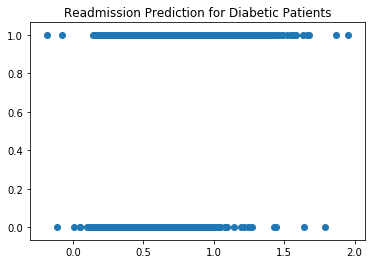

Accuracy_all : 0.077
Accuracy_train : 0.078
Accuracy_test : 0.074
Percent Positive:" 47.2%


In [66]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train), reg.score(X_test, y_test)
plt.scatter(reg.predict(X_test), y_test)
plt.title("Readmission Prediction for Diabetic Patients")
plt.show()
print (f'Accuracy_all : {reg.score(X,y):.3f}')
print (f'Accuracy_train : {reg.score(X_train,y_train):.3f}')
print (f'Accuracy_test : {reg.score(X_test,y_test):.3f}')
print (f'Percent Positive:" {100*y_train.mean():.1f}%')

In [67]:
feature_importances_ = reg.coef_

In [68]:
feature_importances_

array([ 1.05218550e-03,  7.32713328e-04,  2.47686804e-03,  7.86374266e-04,
       -1.18702903e-02,  3.26853553e-04,  1.80852594e-02,  2.08980210e-02,
        7.40265828e-02,  1.84354774e-02,  4.71662683e-02, -4.06563246e-02,
        4.67804717e-02,  1.23775794e-02, -5.30349129e-02, -1.26330819e-02,
        1.05791742e-01,  9.63297434e-02, -2.02121486e-01,  8.11150069e-03,
        2.65393854e-02,  2.29145345e-02, -2.17706464e-02,  8.88547936e-02,
       -5.68263361e-02, -8.84499177e-02,  1.38401167e-02,  1.25063778e-03,
        5.53593167e-03,  2.94944352e-03,  3.85312400e-02, -1.72778017e-02,
       -2.42028818e-02, -1.73292452e-02,  1.57811104e-02,  2.29521913e-02,
       -2.14040565e-02,  4.85082555e-03,  2.70820249e-02, -8.37465055e-03,
       -2.35582000e-02, -4.10065555e-02,  1.30738438e-02,  1.72816768e-02,
        1.06510349e-02, -1.45397098e-01,  5.89278191e-02,  8.09204687e-02,
        5.54881045e-03, -1.06858966e-15, -8.40642436e-02, -1.09486029e-01,
        1.93550273e-01,  

Linear Regression model has very low score since it can't effectively analyze
categorical data which is the majority makeup of the overall data. The data need to be converted into a series of variables which can then be entered into the regression model. For this reason, another model choice might be a better fit.

## Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logModel = LogisticRegression(max_iter=50)
model = logModel.fit(X_train,y_train)
print (f'Accuracy_all : {logModel.score(X,y):.3f}')
print (f'Accuracy_train : {logModel.score(X_train,y_train):.3f}')
print (f'Accuracy_test : {logModel.score(X_test,y_test):.3f}')
print(f'Percent Negative:" {100*(1-y_train).mean():.1f}%')

Accuracy_all : 0.619
Accuracy_train : 0.618
Accuracy_test : 0.620
Percent Negative:" 52.8%


/Users/kieuha/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
feature_importances_ = model.coef_[0]
model.feature_importances_ = feature_importances_

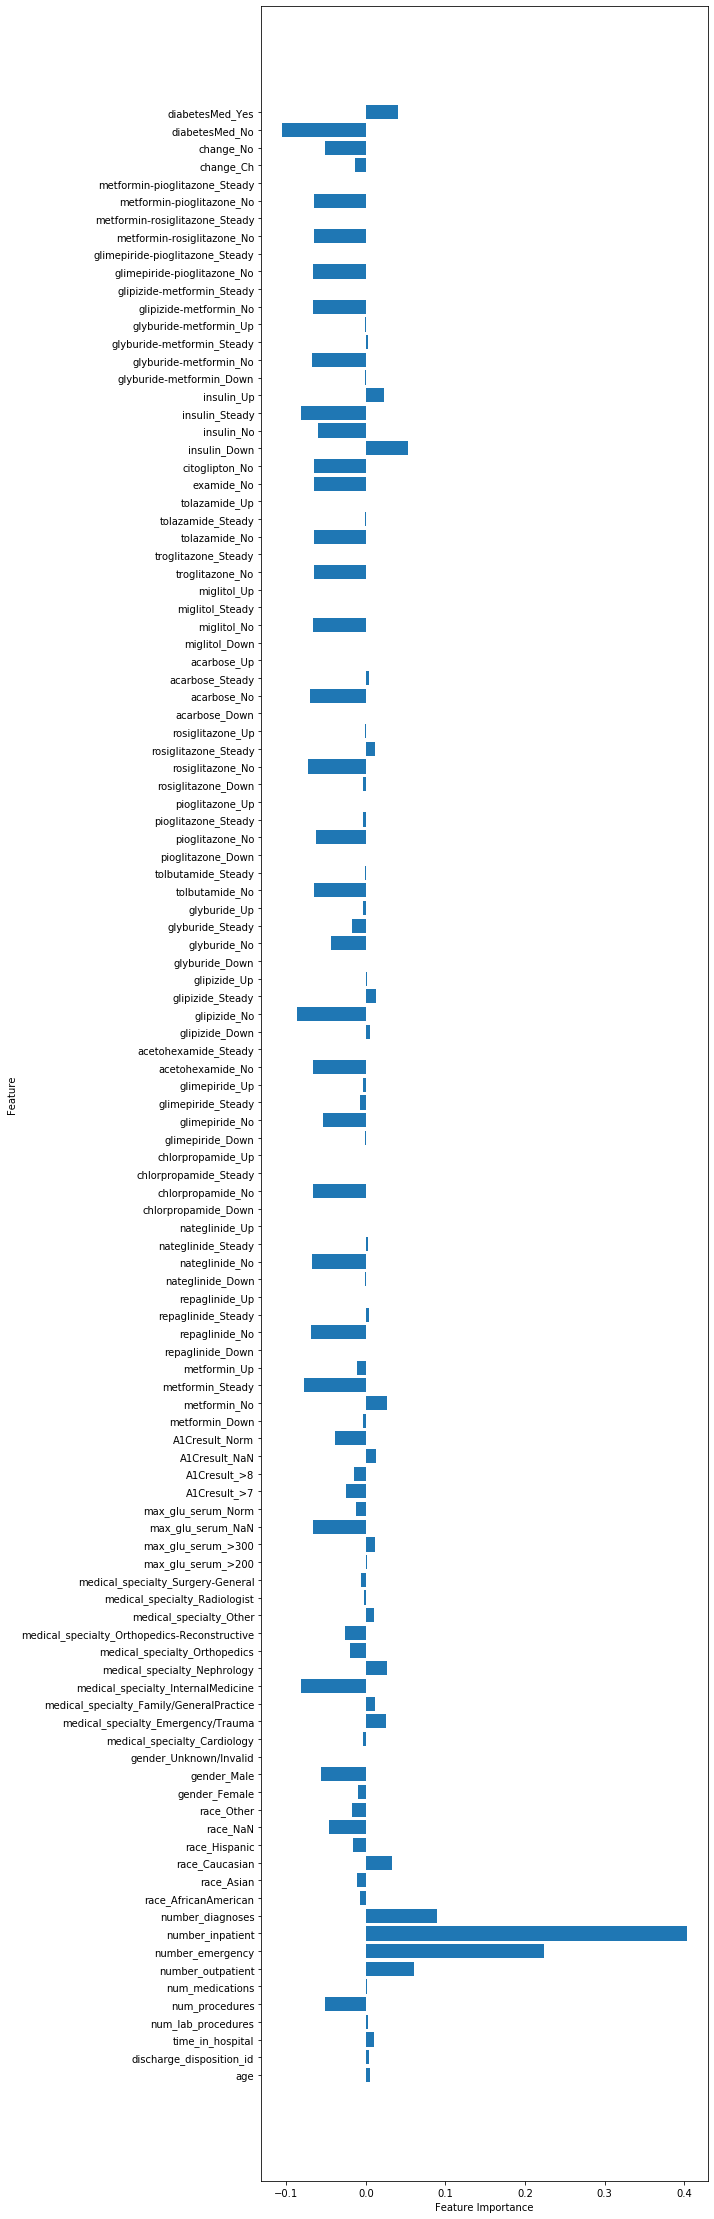

In [74]:
plot_feature_importances(logModel)

The importance features are: number of diagnoses, number of inpatient, number of emergency, number of medications, lab procesures and discharge id. These columns have positive relationship with time spent in the hospital. 

Logistic Regression is a good regression analysis to use for predicting categorical data. The accuracy score is on the low side. There maybe many reasons for having a low score such as the features need more tuning. Sometimes, the prediction can only be as accurate as the data allows.

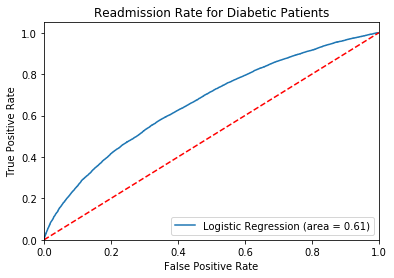

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Readmission Rate for Diabetic Patients')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The logistic regression model predicts better than pure random choice. However, it is not ideal since the score is only 0.62 with 1 being the best and 0 being the worst. 

## Random Forest

Random Forest was chosen as the model for the project. There are totally of 115 features in the data. Random forest provides certain benefits that makes it more attractive than other models. Random Forest is based on bagging (bootstrap aggregation) which averages the results over many decision trees from sub-samples to give a more accurate and stable prediction. 

Random Forest is also a powerful algorithm that optimizes both the number of tress and number of features at each node. It works well with hyperparameters, categorical and numerical features. It does not require an extensive feature selection to find the most important feature. Instead, it searches for the best feature among a random subset of features. 

The downside of Random Forest is that it tends to overfit. 

In [76]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Feature Importance

In [77]:
clf = RandomForestClassifier(random_state = 42, max_depth=11)
model = clf.fit(X_train, y_train)

print (f'Accuracy_all : {clf.score(X,y):.3f}')
print (f'Accuracy_train : {clf.score(X_train,y_train):.3f}')
print (f'Accuracy_test : {clf.score(X_test,y_test):.3f}')
print (f'Percent Positive: {100*y_train.mean():.1f}%')
print (f'Precision: {100*((y_test == (model.predict(X_test)))[y_test==0]).mean()}%')

Accuracy_all : 0.653
Accuracy_train : 0.663
Accuracy_test : 0.631
Percent Positive: 47.2%
Precision: 75.17665307060378%


In [78]:
100*model.predict(X_test).mean()

36.37861086538755

In [79]:
# Feature importance
clf.feature_importances_

array([3.83038860e-02, 3.15892893e-02, 3.48095706e-02, 5.17973942e-02,
       2.82291667e-02, 6.31503887e-02, 5.60301834e-02, 8.35002972e-02,
       2.84909662e-01, 7.30840140e-02, 6.28148627e-03, 1.78575577e-03,
       7.85205123e-03, 3.65061182e-03, 6.60163358e-03, 2.95001279e-03,
       6.57032138e-03, 6.99523686e-03, 8.77400899e-06, 3.85614548e-03,
       5.40895809e-03, 4.88161214e-03, 7.18378801e-03, 4.78739989e-03,
       3.20136882e-03, 4.37600535e-03, 6.86872454e-03, 1.90745946e-03,
       3.26906211e-03, 2.76359668e-03, 3.72847041e-03, 6.11838368e-03,
       3.79194547e-03, 2.91973432e-03, 5.10914956e-03, 6.42661002e-03,
       4.95504752e-03, 1.19653436e-03, 9.15289702e-03, 6.13164063e-03,
       1.46371956e-03, 1.26880473e-04, 1.83645364e-03, 1.90029183e-03,
       3.72501212e-04, 3.35304040e-05, 1.21899871e-03, 1.09021006e-03,
       1.16207693e-04, 0.00000000e+00, 1.70949959e-04, 2.22025972e-04,
       2.19139465e-05, 6.18312608e-04, 2.89940687e-03, 2.53536753e-03,
      

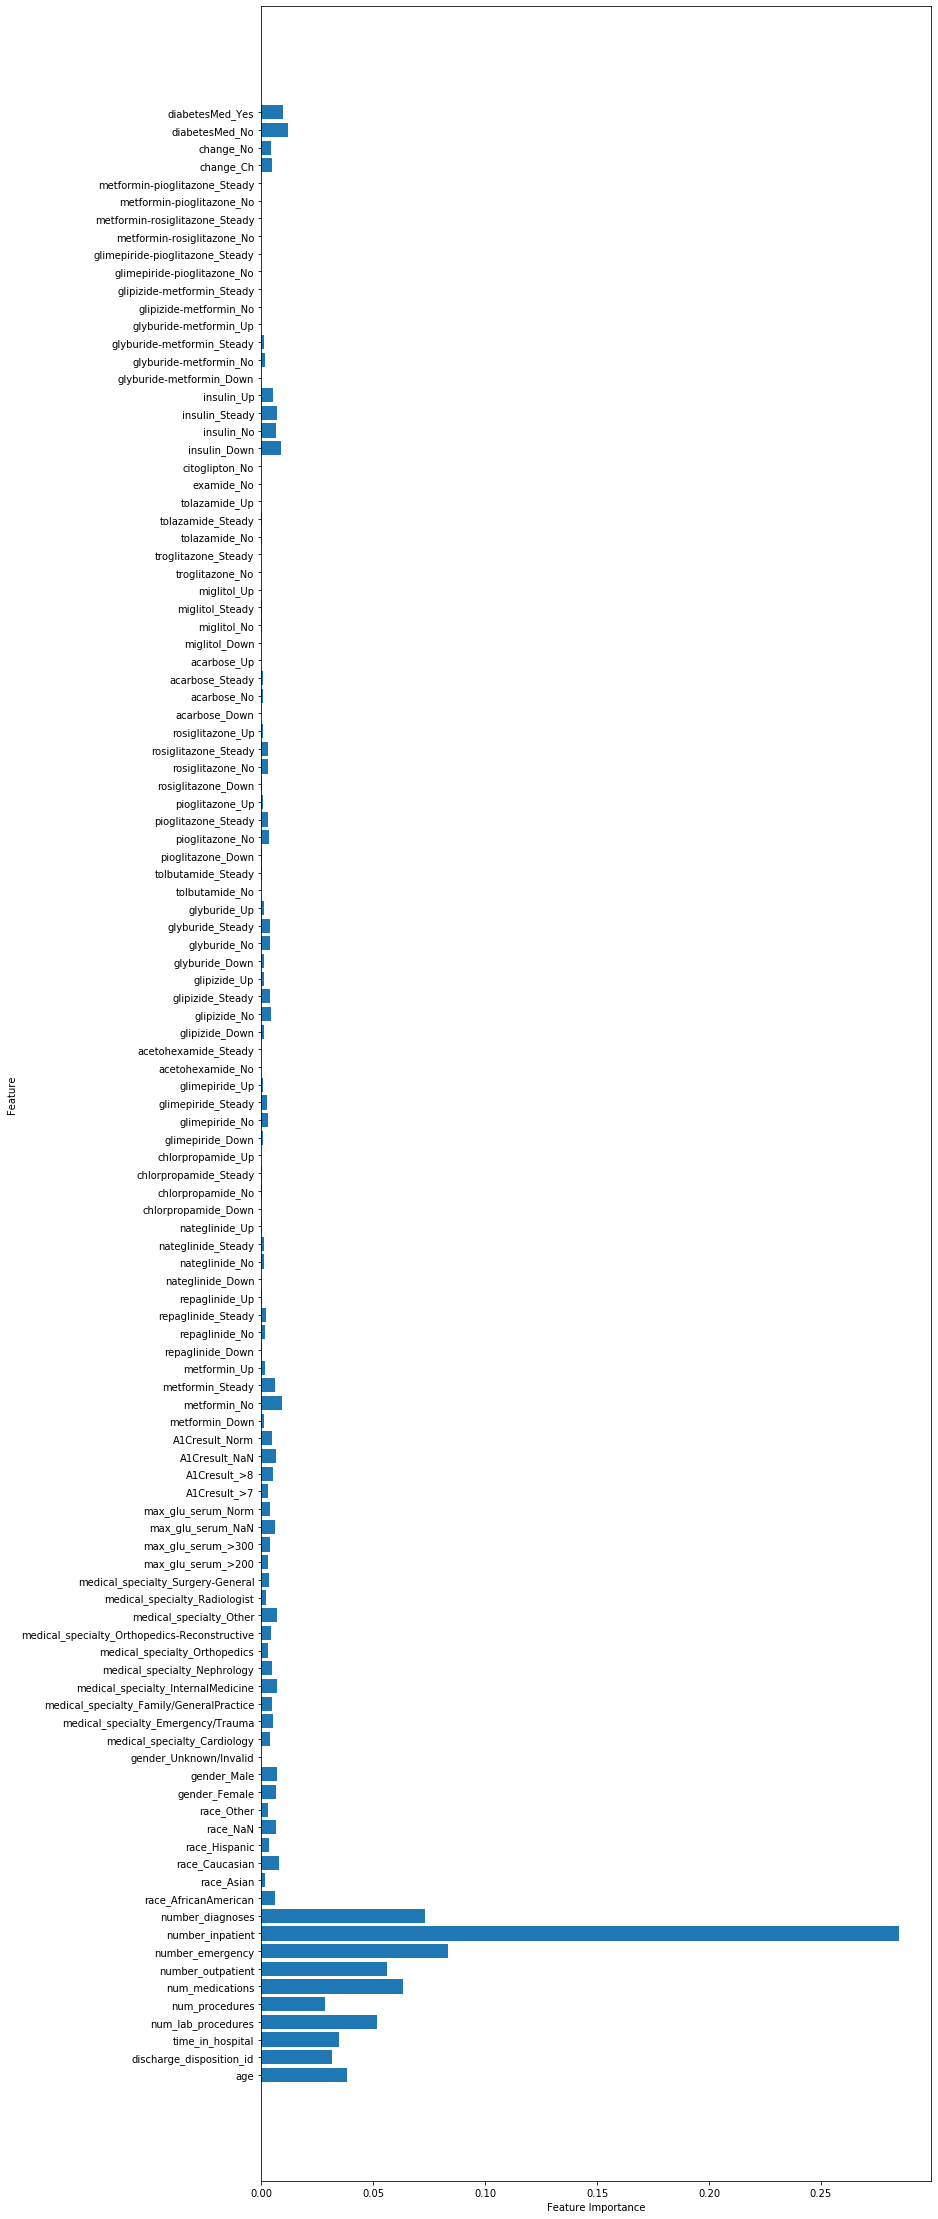

In [83]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(12,40))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

plot_feature_importances(clf)

There are totally of 115 features in the data. The important features are number of diagnoses, number of inpatients, number of emergencies, number of medications, lab procedures and discharge ids with addition of insulin, diabetes medication columns. 

In [84]:
# Test set predictions
pred = clf.predict(X_test)

print (f'Accuracy_all : {clf.score(X,y):.3f}')
print (f'Accuracy_train : {clf.score(X_train,y_train):.3f}')
print (f'Accuracy_test : {clf.score(X_test,y_test):.3f}')
print(f'Percent Negative:" {100*(1-y_train).mean():.1f}%')

Accuracy_all : 0.653
Accuracy_train : 0.663
Accuracy_test : 0.631
Percent Negative:" 52.8%


### Tree Depth Selection

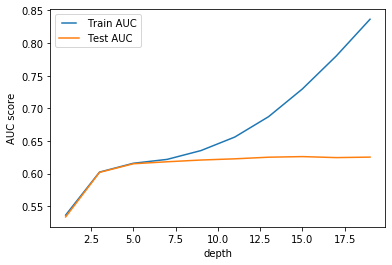

In [85]:

train_results_list = []
test_results_list = []
for depth in range (1, 20, 2):
    clf = RandomForestClassifier(n_estimators = 200, max_depth=depth, random_state=0, )
    model_RD = clf.fit(X_train, y_train)
   
    train_pred = model_RD.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results_list.append(roc_auc)
    y_pred = model_RD.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results_list.append(roc_auc)
    
depth_list = [1,3,5,7,9,11,13,15,17,19]
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(depth_list, train_results_list, label= "Train AUC")
line2, = plt.plot(depth_list, test_results_list, label= "Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("depth")
plt.show()

As the tree depth increases, the accuracy scores also increases. The ideal tree depth to pick from is the one with both high accuracy scores and the scores are consistent between training and tesing datasets. The tree depth = 9 gives the best ACU traing and test results in this case. 

### Number of Trees Selection

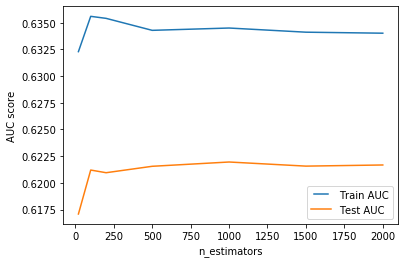

In [86]:
n_estimators = [20, 100, 200, 500, 1000, 1500, 2000]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, max_depth=9, random_state=0, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, label= "Train AUC")
line2, = plt.plot(n_estimators, test_results, label= "Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

The AUC score does not change as n-estimator is grater than 100. For a Random Forest model with over 50 features, the n_estimator is typcally set at over 1000 trees.

### Samples Split Selection

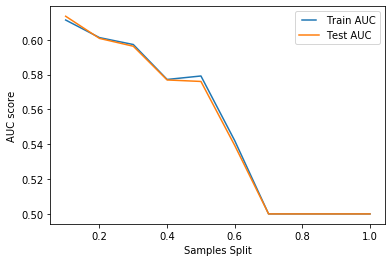

In [87]:
min_samples_splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
# Plot
line1, = plt.plot(min_samples_splits, train_results, label= "Train AUC")
line2, = plt.plot(min_samples_splits, test_results, label= "Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Samples Split')
plt.show()

Both train and test AUC scores are consistent with each other. As the sample split increases, both scores decreases. The ideal sample split is between 0 and 0.3. 

## Random Forest Model with Applied Parameters

### Build Random Forest

In [88]:
train_results_list = []
test_results_list = []

clf = RandomForestClassifier(n_estimators = 1500, max_depth=9, \
                                 min_samples_split = 0.3, random_state = 42,\
                            n_jobs=-1)
model_RD = clf.fit(X_train, y_train)
    
print (f'Accuracy_all : {clf.score(X,y):.3f}')
print (f'Accuracy_train : {clf.score(X_train,y_train):.3f}')
print (f'Accuracy_test : {clf.score(X_test,y_test):.3f}')
print(f'Percent Positive:" {100*y_train.mean():.1f}%')

Accuracy_all : 0.610
Accuracy_train : 0.609
Accuracy_test : 0.610
Percent Positive:" 47.2%


Random Forest model performs very similar to logistic regression. The prediction rate is slightly better than  prediction of a coin toss. It indicates that there is some signal. However, it is not very strong. 

In [89]:
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

Number of times the model was correct with training data

In [90]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0      40550
1      19997
255     6010
Name: readmitted_NO, dtype: int64
------------------------------------
0      0.609252
1      0.300449
255    0.090299
Name: readmitted_NO, dtype: float64


Number of times the model was correct with testing data

In [91]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0      20014
1       9759
255     3010
Name: readmitted_NO, dtype: int64
------------------------------------
0      0.610499
1      0.297685
255    0.091816
Name: readmitted_NO, dtype: float64


### Validation 

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

rdf = RandomForestClassifier(criterion = 'entropy', n_estimators=1500, \
                             max_depth=9, random_state=42, n_jobs=-1)
rdf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=1500,
                       n_jobs=-1, random_state=42)

In [93]:
rdf_pred_train = rdf.predict(X_train)
print('Train Set Evaluation F1-Score=>',f1_score(y_train,rdf_pred_train))

Train Set Evaluation F1-Score=> 0.567586156964958


In [94]:
rdf_pred_test = rdf.predict(X_test)
print('Test Set Evaluation F1-Score=>',f1_score(y_test,rdf_pred_test))

Test Set Evaluation F1-Score=> 0.5538869257950529


In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [96]:
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.58274612, 0.60066438, 0.59089994, 0.62281055, 0.63287699])

In [97]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.61 (+/- 0.04)


Validation with the cross_val_score hepler function on the estimator and the dataset also gives an accuracy score of 0.61. This is consistent with the results seen above. 

## Gradient Boosting Classifier

In [98]:
from sklearn.ensemble import GradientBoostingClassifier 
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gbc = GradientBoostingClassifier(n_estimators=20, \
            learning_rate = learning_rate, max_features = 2, \
            max_depth=2, random_state = 0)
    gbc.fit(X_train, y_train)

In [99]:
print (f'Accuracy_all : {gbc.score(X,y):.3f}')
print (f'Accuracy_train : {gbc.score(X_train,y_train):.3f}')
print (f'Accuracy_test : {gbc.score(X_test,y_test):.3f}')
print(f'Percent Positive:" {100*y_train.mean():.1f}%')

Accuracy_all : 0.620
Accuracy_train : 0.620
Accuracy_test : 0.620
Percent Positive:" 47.2%


Gradient Booster also gives similar results as Random Forest. 

## eXtreme Gradient Boosting (XGBoost)

In [100]:
conda install py-xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [101]:
import xgboost
from xgboost import XGBClassifier

In [102]:

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier()

In [103]:
print (f'Accuracy_all : {xgb_clf.score(X,y):.3f}')
print (f'Accuracy_train : {xgb_clf.score(X_train,y_train):.3f}')
print (f'Accuracy_test : {xgb_clf.score(X_test,y_test):.3f}')
print(f'Percent Positive:" {100*y_train.mean():.1f}%')

Accuracy_all : 0.631
Accuracy_train : 0.632
Accuracy_test : 0.631
Percent Positive:" 47.2%


XGBoost gives the best results compared to others. 

## Decision Tree

### Building The Trees

In [104]:
from sklearn.tree import DecisionTreeClassifier
DT_train = DecisionTreeClassifier(max_depth = 7, random_state = 20)
DT_train.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=20)

In [105]:
print (f'Accuracy_all : {DT_train.score(X,y):.3f}')
print (f'Accuracy_train : {DT_train.score(X_train,y_train):.3f}')
print (f'Accuracy_test : {DT_train.score(X_test,y_test):.3f}')
print(f'Percent Positive:" {100*y_train.mean():.1f}%')

Accuracy_all : 0.627
Accuracy_train : 0.630
Accuracy_test : 0.621
Percent Positive:" 47.2%


### Predict and Evaluate

In [106]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [107]:
feature_names=X.columns
feature_names

Index(['age', 'discharge_disposition_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses',
       ...
       'glimepiride-pioglitazone_No', 'glimepiride-pioglitazone_Steady',
       'metformin-rosiglitazone_No', 'metformin-rosiglitazone_Steady',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes'],
      dtype='object', length=112)

### Single Tree Visualization

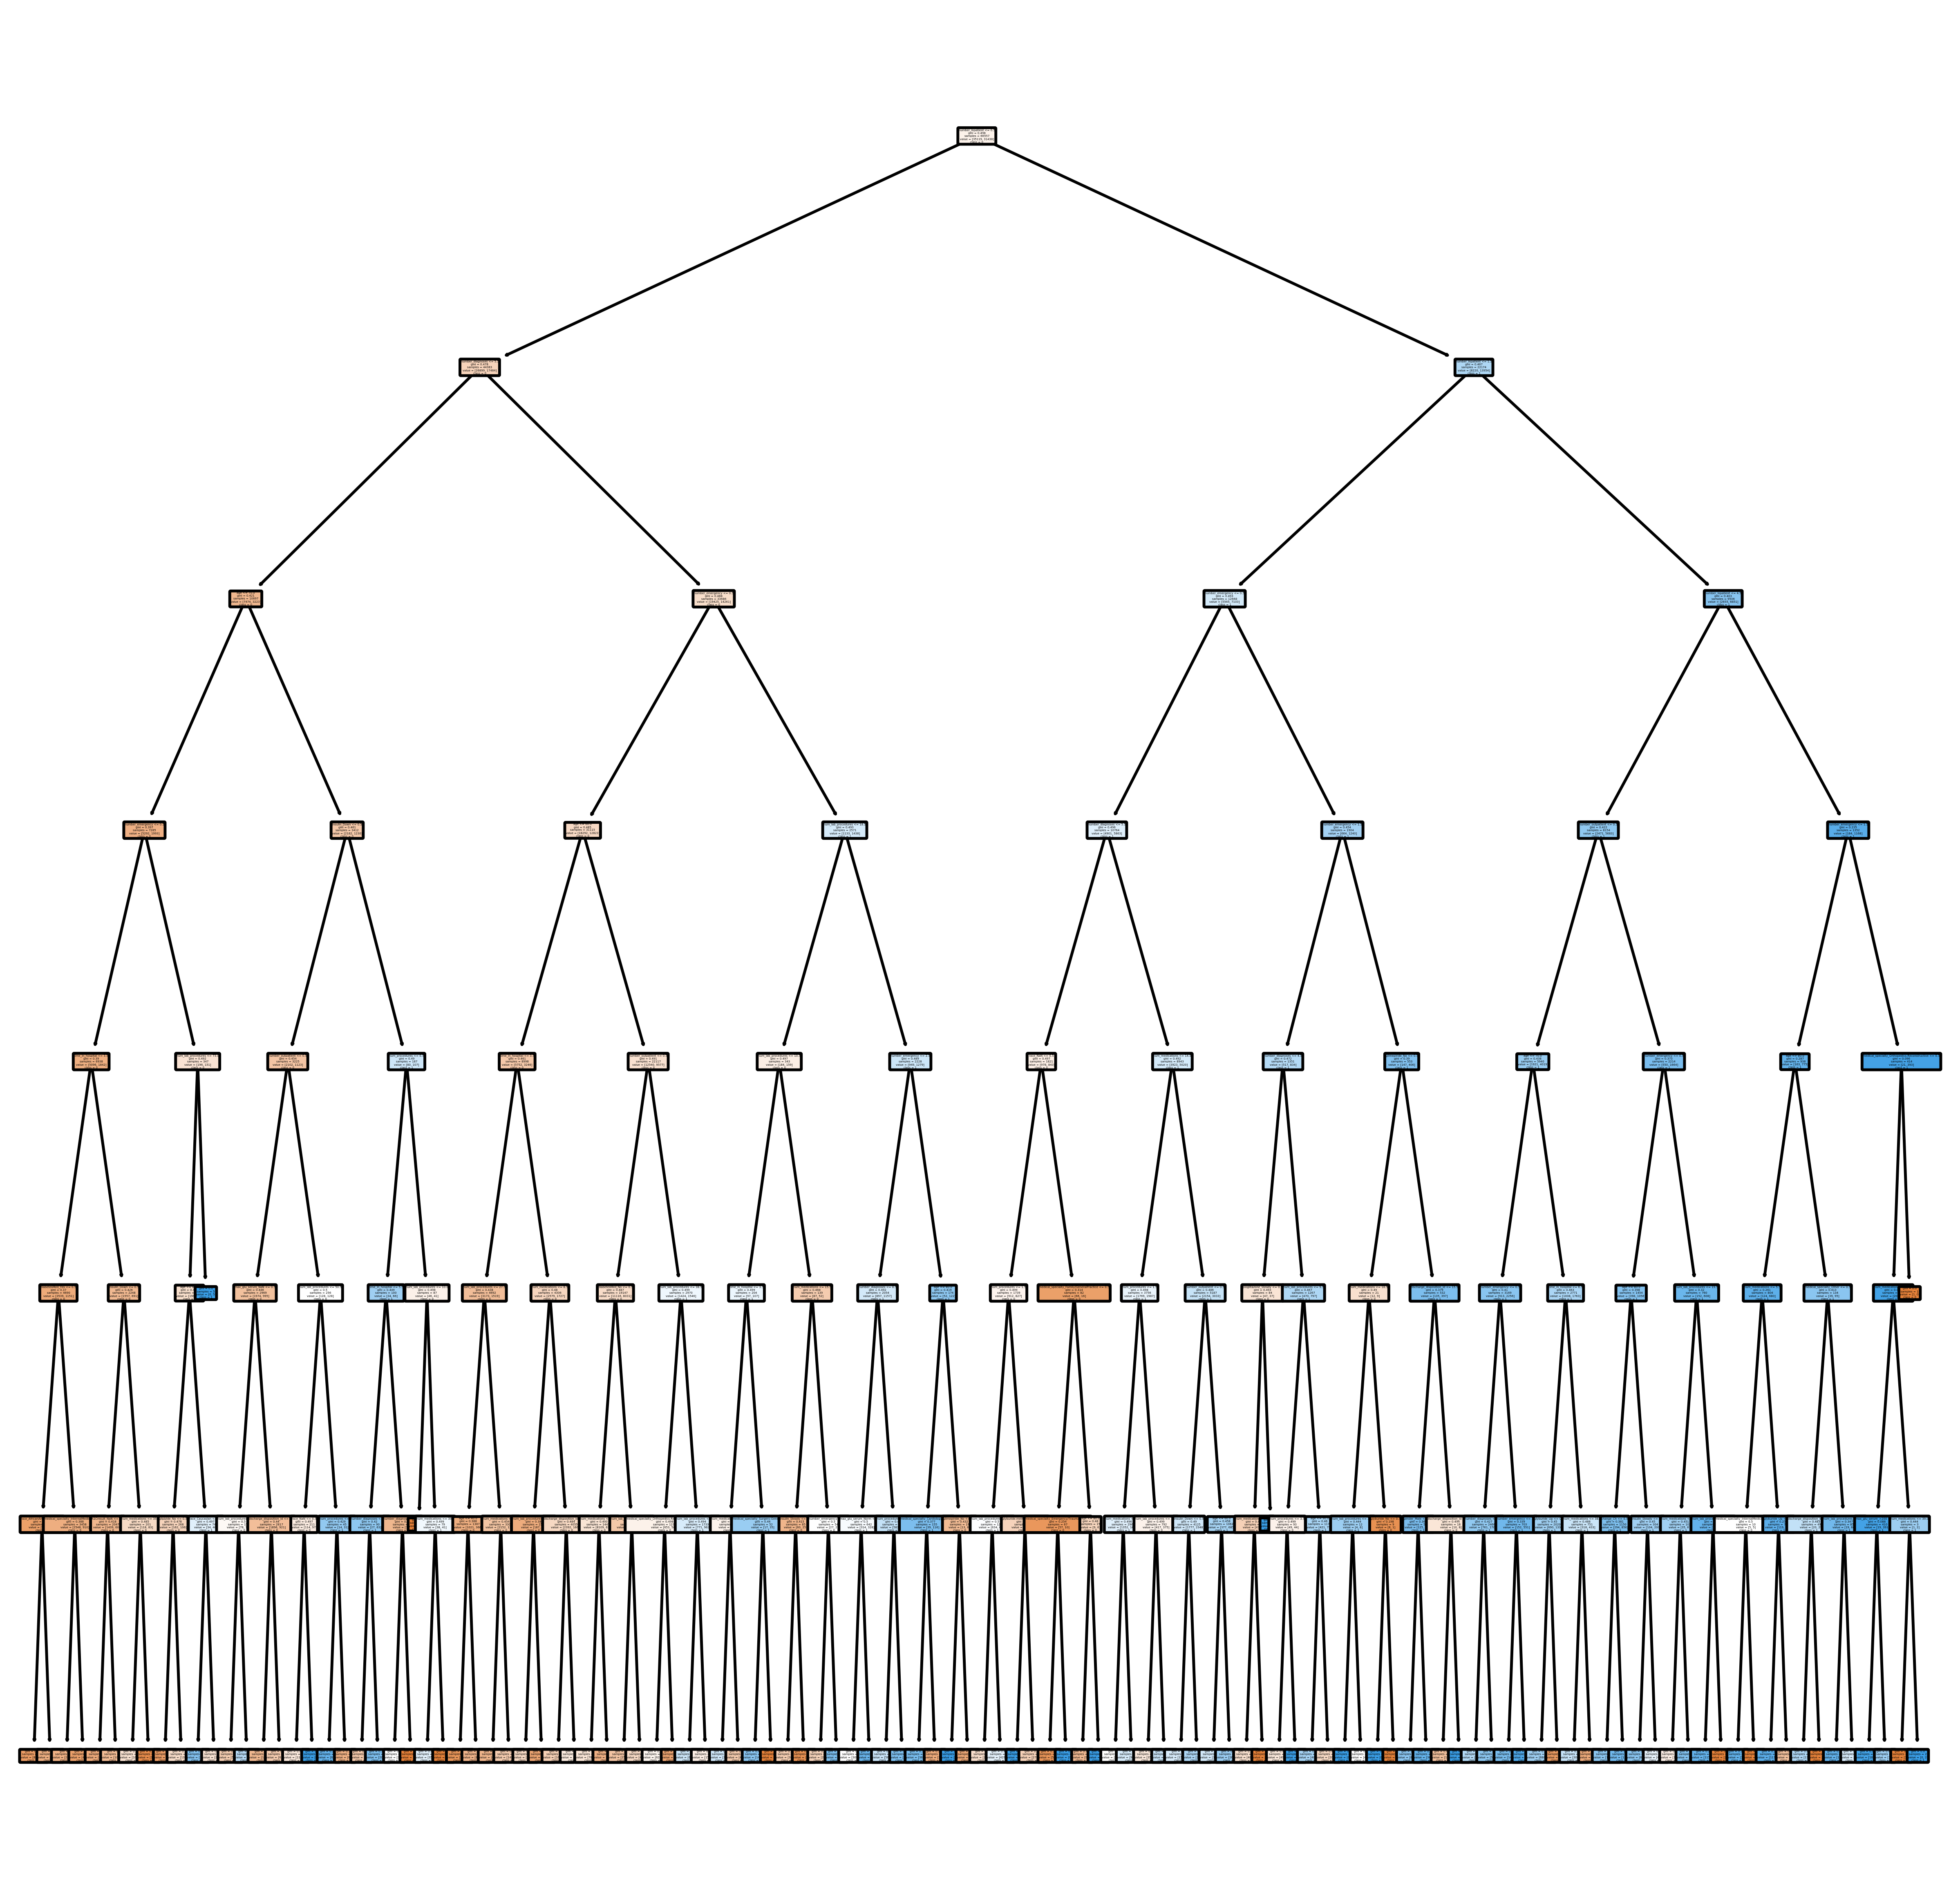

In [108]:
# Plot and show decision tree
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(DT_train, feature_names=X.columns,\
               class_names=np.unique(y).astype('str'), filled=True, rounded=True)
plt.show()

In [109]:
# Export as dot file
export_graphviz(DT_train, 
                out_file='tree.dot', 
                feature_names = X.columns,\
                class_names=np.unique(y).astype('str'),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [110]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [111]:
# Display with Image
from IPython.display import Image
Image(filename = 'tree.png')

# Conclusion

Prediction of hospital readmission for diabetes patients is possible using hospital record data about the diagnostics, medication, lab test results, medical specialty information and procedures given to patients. The models demonstrated that predictions can be made for readmission for diabetes patients. All models (Logistic Regression, XGBoost, and Random Foress) gave an accuracy score of ~ 61%. The models The accuracy is slightly better than a coin toss. However, the score can be improved by tuning important features. These features may be best selected by those who have skills and traning to understand what roles they play in the prediction. A patient with diabetes may return to the hospital for many reasons according to a study published by "Journal of General Internal Medicine". Heart failure is the most common reason (7). The article also mentions that the vast majority of readmissions were not caused directly by diabetes. However, diabetes caused by severe dysglycemia is the 11th most common cause for hopsitalization and the 14th most comon for readdmission (7). This may suggest that a patient is readmitted to the hospital initially for a non-diabetes reason, but later it turns out to be related to diabetes. The data is best analyzed with the help of a medical expert. This is where domain knowledge becomes key to selecting features and analyzing data. 

# References

1. Wilcox G. Insulin and insulin resistance. Clin Biochem Rev. 2005;26(2):19-39.

2. Ostling, S., Wyckoff, J., Ciarkowski, S.L. et al. The relationship between diabetes mellitus and 30-day readmission rates. Clin Diabetes Endocrinol 3, 3 (2017). https://doi.org/10.1186/s40842-016-0040-x

3. McIlvennan CK, Eapen ZJ, Allen LA. Hospital readmissions reduction program. Circulation. 2015;131(20):1796-1803. doi:10.1161/CIRCULATIONAHA.114.010270

4. Rozalina G. McCoy, Kasia J. Lipska, Jeph Herrin, Molly M. Jeffery, Harlan M. Krumholz, Nilay D. Shah. Hospital Readmissions among Commercially Insured and Medicare Advantage Beneficiaries with Diabetes and the Impact of Severe Hypoglycemic and Hyperglycemic Events. Journal of General Internal Medicine, 2017; DOI: 10.1007/s11606-017-4095-x.

5. Centers for Disease Control and Prevention. National Diabetes Statistics Report, 2020. Atlanta, GA: Centers for Disease Control and Prevention, U.S. Dept of Health and Human Services; 2020.

6. Diabetes—A Major Health Problem. https://www.cdc.gov/diabetes/ndep/pdfs/ppod-guide-diabetes-major-health-problem.pdf

7. McCoy, R.G., Lipska, K.J., Herrin, J. et al. Hospital Readmissions among Commercially Insured and Medicare Advantage Beneficiaries with Diabetes and the Impact of Severe Hypoglycemic and Hyperglycemic Events. J GEN INTERN MED 32, 1097–1105 (2017). https://doi.org/10.1007/s11606-017-4095-x